In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa
import librosa.display


import IPython.display as ipd
from IPython.display import Image

import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import sklearn
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import load_model


In [25]:
voice = '/emodb/wav/03a01Fa.wav'

In [26]:
data, rate_of_sampling = librosa.load('emodb/wav/03a01Fa.wav')
rate_of_sampling

22050

In [27]:
ipd.Audio('emodb/wav/03a01Fa.wav')

In [28]:
len(data)

41857

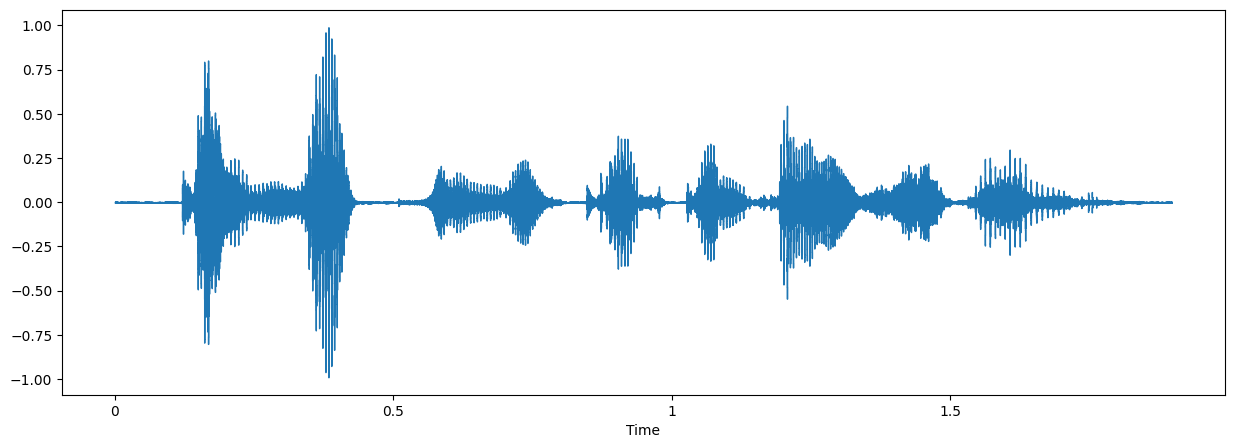

In [29]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=rate_of_sampling)

In [30]:
path = 'emodb/wav'
destination_path = 'emodb/wav_train_test'

In [31]:
encoded_emotion = {'W':0, 'L':1, 'E':2, 'A':3, 'F':4, 'T':5, 'N':6}

In [32]:
label = []
file_path = []

In [33]:
for file in os.listdir(path):
  if file.endswith('.wav'):
    file_path.append(file)
    label.append(encoded_emotion[file[5]])

In [34]:
df = pd.DataFrame({
        'file_path':file_path,'label':label,
    }
)
df

,file_path,label
0,03a01Fa.wav,4
1,03a01Nc.wav,6
2,03a01Wa.wav,0
3,03a02Fc.wav,4
4,03a02Nc.wav,6
...,...,...
530,16b10Lb.wav,1
531,16b10Tb.wav,5
532,16b10Td.wav,5
533,16b10Wa.wav,0


In [36]:
X = np.array(df.label.unique())
X.sort()
X

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [37]:
unique_values = df.label.value_counts(sort = True)
unique_values

0    127
1     81
6     79
4     71
3     69
5     62
2     46
Name: label, dtype: int64

In [38]:
plot_y = []
for x in X:
  plot_y.append(unique_values[x])
plot_y

[127, 81, 46, 69, 71, 62, 79]

In [39]:
unique_values = pd.DataFrame(unique_values)

In [40]:
mfcc = librosa.feature.mfcc(y = data , sr = rate_of_sampling, n_mfcc = 20)

In [41]:
mfcc.shape

(20, 82)

In [42]:
mfcc

array([[-573.01196  , -582.12134  , -586.8176   , ..., -492.71088  ,
        -531.3699   , -549.42737  ],
       [  40.869022 ,   42.113426 ,   34.175797 , ...,   80.3799   ,
          71.04459  ,   57.802822 ],
       [  22.214771 ,   30.598278 ,   32.493942 , ...,   -9.611155 ,
          10.583006 ,   20.991535 ],
       ...,
       [   3.1278315,    2.276405 ,    3.3137722, ...,    5.9192305,
           4.657548 ,    2.0677426],
       [   4.8470707,    2.675071 ,    2.577607 , ...,   13.503    ,
          13.435967 ,    7.1793947],
       [   4.2935753,    2.4341059,    1.7580795, ...,   -3.2146842,
          -3.330796 ,    1.3146564]], dtype=float32)

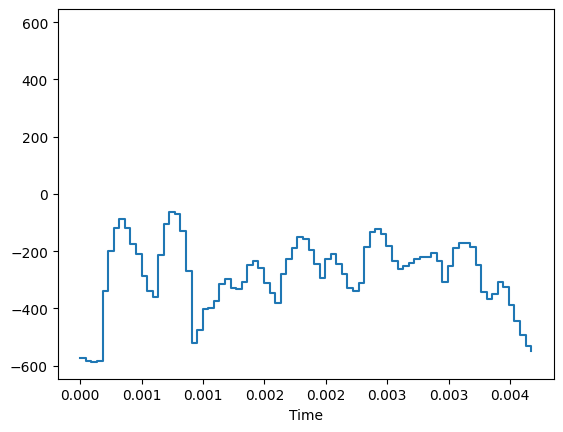

In [43]:
librosa.display.waveshow(mfcc, sr=rate_of_sampling)

In [45]:
df['file_path']
audio_values = []
x = 1
for audio_file in df['file_path']:
  data, sampling_rate = librosa.load(f'emodb/wav/{audio_file}')
  mfcc = librosa.feature.mfcc(y = data , sr = sampling_rate, n_mfcc = 20)
  audio_values.append(mfcc)

In [46]:
audio_values[0]

array([[-573.01196  , -582.12134  , -586.8176   , ..., -492.71088  ,
        -531.3699   , -549.42737  ],
       [  40.869022 ,   42.113426 ,   34.175797 , ...,   80.3799   ,
          71.04459  ,   57.802822 ],
       [  22.214771 ,   30.598278 ,   32.493942 , ...,   -9.611155 ,
          10.583006 ,   20.991535 ],
       ...,
       [   3.1278315,    2.276405 ,    3.3137722, ...,    5.9192305,
           4.657548 ,    2.0677426],
       [   4.8470707,    2.675071 ,    2.577607 , ...,   13.503    ,
          13.435967 ,    7.1793947],
       [   4.2935753,    2.4341059,    1.7580795, ...,   -3.2146842,
          -3.330796 ,    1.3146564]], dtype=float32)

In [47]:
len_col = [aud.shape[1] for aud in audio_values]
col_len_max = max(len_col)
col_len_max

387

In [50]:
audio_values_padded = audio_values.copy()
for ind, arr in enumerate(audio_values_padded):
  arr_shape = arr.shape[1]
  zero_cols = col_len_max - arr_shape
  zero_arr = np.zeros((arr.shape[0], zero_cols))
  result_arr = np.hstack((arr, zero_arr))
  audio_values_padded[ind] = result_arr
audio_values_padded[20].shape

(20, 387)

In [49]:
audio_values[20].shape

(20, 92)

In [52]:
audio_values[0]

array([[-573.01196  , -582.12134  , -586.8176   , ..., -492.71088  ,
        -531.3699   , -549.42737  ],
       [  40.869022 ,   42.113426 ,   34.175797 , ...,   80.3799   ,
          71.04459  ,   57.802822 ],
       [  22.214771 ,   30.598278 ,   32.493942 , ...,   -9.611155 ,
          10.583006 ,   20.991535 ],
       ...,
       [   3.1278315,    2.276405 ,    3.3137722, ...,    5.9192305,
           4.657548 ,    2.0677426],
       [   4.8470707,    2.675071 ,    2.577607 , ...,   13.503    ,
          13.435967 ,    7.1793947],
       [   4.2935753,    2.4341059,    1.7580795, ...,   -3.2146842,
          -3.330796 ,    1.3146564]], dtype=float32)

In [53]:
sta_scaler = StandardScaler()
for ind, aud in enumerate(audio_values):
  audio_values[ind] = sta_scaler.fit_transform(audio_values[ind])
  audio_values_padded[ind] = sta_scaler.fit_transform(audio_values_padded[ind])
audio_values[230].shape

(20, 225)

In [54]:
df = pd.DataFrame(
    {
        'audio': audio_values_padded,
        'labels': label
    }
)

In [55]:
unpad_DataFrame = pd.DataFrame(
    {
        'audio':audio_values,
        'labels':label
    }
)

In [56]:
df

,audio,labels
0,"[[-4.345240606636697, -4.345280245505488, -4.3...",4
1,"[[-4.3273671723845375, -4.297923112827706, -4....",6
2,"[[-4.357944622291275, -4.355985900723285, -4.3...",0
3,"[[-4.3036640193906965, -4.272188294612251, -4....",4
4,"[[-4.351372638345867, -4.343620000765398, -4.3...",6
...,...,...
530,"[[-4.253246113927521, -4.2693504117850125, -4....",1
531,"[[-4.32137243562459, -4.329907616419353, -4.33...",5
532,"[[-4.310066644173442, -4.330933367137214, -4.3...",5
533,"[[-4.3412139053771375, -4.3357660491362955, -4...",0


In [57]:
df['audio'][0].shape

(20, 387)

In [58]:
flattened_DataFrame = df.copy()
flattened_DataFrame['audio'] = flattened_DataFrame['audio'].apply(lambda x : x.reshape(-1))

In [59]:
df['audio'][0]

array([[-4.34524061, -4.34528025, -4.34747162, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46126633,  0.46104864,  0.40148468, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31520905,  0.37238714,  0.38862294, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.16576394,  0.15432137,  0.16547186, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17922508,  0.15739092,  0.15984215, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17489137,  0.1555356 ,  0.15357493, ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
X = flattened_DataFrame['audio']
X

0      [-4.345240606636697, -4.345280245505488, -4.34...
1      [-4.3273671723845375, -4.297923112827706, -4.3...
2      [-4.357944622291275, -4.355985900723285, -4.35...
3      [-4.3036640193906965, -4.272188294612251, -4.2...
4      [-4.351372638345867, -4.343620000765398, -4.34...
                             ...                        
530    [-4.253246113927521, -4.2693504117850125, -4.3...
531    [-4.32137243562459, -4.329907616419353, -4.334...
532    [-4.310066644173442, -4.330933367137214, -4.33...
533    [-4.3412139053771375, -4.3357660491362955, -4....
534    [-4.339317445845838, -4.341516229273682, -4.23...
Name: audio, Length: 535, dtype: object

In [61]:
X[100].shape

(7740,)

In [64]:
y = df['labels']
y

0      4
1      6
2      0
3      4
4      6
      ..
530    1
531    5
532    5
533    0
534    0
Name: labels, Length: 535, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [80]:
X_train.shape

(481,)

In [74]:
X_train_result = X_train.to_numpy().flatten()
X_train_tensor = tf.stack(X_train_result)

In [75]:
X_test_result = X_test.to_numpy().flatten()
X_test_tensor = tf.stack(X_test_result)

In [76]:
X_train_tensor_result = np.reshape(X_train_tensor, (X_train_tensor.shape[0], 1, X_train_tensor.shape[1]))
X_test_tensor_result = np.reshape(X_test_tensor, (X_test_tensor.shape[0], 1, X_test_tensor.shape[1]))

In [78]:
y_train_encoded = tf.one_hot(y_train, 7)
y_train_encoded.shape

TensorShape([481, 7])

In [79]:
y_test_encoded = tf.one_hot(y_test, 7)

In [81]:
model = tf.keras.Sequential()

model.add(Bidirectional(LSTM(units = 512 , return_sequences = True), input_shape = (None,7740),))
model.add(layers.Dropout(0.7))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences = True),))
model.add(layers.Dropout(0.7))
model.add(layers.Bidirectional(layers.LSTM(units = 1024, return_sequences = True)))
model.add(layers.Dropout(0.9))
model.add(layers.Bidirectional(layers.LSTM(units = 512, return_sequences = True)))
model.add(Bidirectional(layers.GRU(512)))
model.add(layers.Dense(7, activation = 'sigmoid'))


In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, None, 1024)        33804288  
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 1024)        0         
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 1024)        4724736   
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 1024)        0         
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 2048)        16785408  
 onal)                                                           
                                                        

In [83]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy', 'FalseNegatives', 'FalsePositives', 'Precision', 'Recall']
)

In [84]:
history = model.fit(X_train_tensor_result, y_train_encoded,validation_split = 0.1, batch_size = 50, epochs = 100, verbose = 2)

Epoch 1/100


9/9 - 46s - loss: 1.9443 - accuracy: 0.1597 - false_negatives: 197.0000 - false_positives: 1303.0000 - precision: 0.1528 - recall: 0.5440 - val_loss: 1.9381 - val_accuracy: 0.3061 - val_false_negatives: 18.0000 - val_false_positives: 118.0000 - val_precision: 0.2081 - val_recall: 0.6327 - 46s/epoch - 5s/step
Epoch 2/100
9/9 - 14s - loss: 1.9369 - accuracy: 0.2269 - false_negatives: 168.0000 - false_positives: 1215.0000 - precision: 0.1785 - recall: 0.6111 - val_loss: 1.9283 - val_accuracy: 0.3061 - val_false_negatives: 19.0000 - val_false_positives: 116.0000 - val_precision: 0.2055 - val_recall: 0.6122 - 14s/epoch - 2s/step
Epoch 3/100
9/9 - 13s - loss: 1.9299 - accuracy: 0.2454 - false_negatives: 171.0000 - false_positives: 1199.0000 - precision: 0.1788 - recall: 0.6042 - val_loss: 1.9158 - val_accuracy: 0.3061 - val_false_negatives: 19.0000 - val_false_positives: 105.0000 - val_precision: 0.2222 - val_recall: 0.6122 - 13s/epoch - 1s/step
Epoch 4/100
9/9 - 13s - loss: 1.

In [85]:
loss = model.evaluate(X_test_tensor_result, y_test_encoded, verbose = 2)

2/2 - 0s - loss: 2.9972 - accuracy: 0.5370 - false_negatives: 3.0000 - false_positives: 100.0000 - precision: 0.3377 - recall: 0.9444 - 221ms/epoch - 110ms/step


In [86]:
loss

[2.9972240924835205,
 0.5370370149612427,
 3.0,
 100.0,
 0.33774834871292114,
 0.9444444179534912]

In [87]:
model.save("Model1.h5")

C:\Users\91824\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


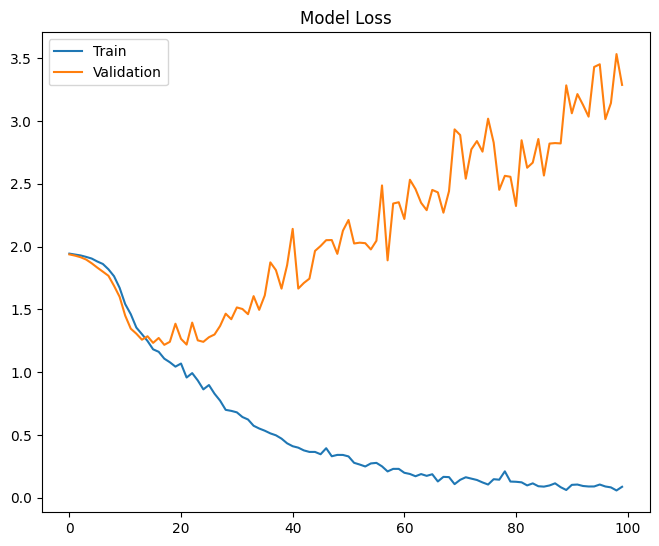

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

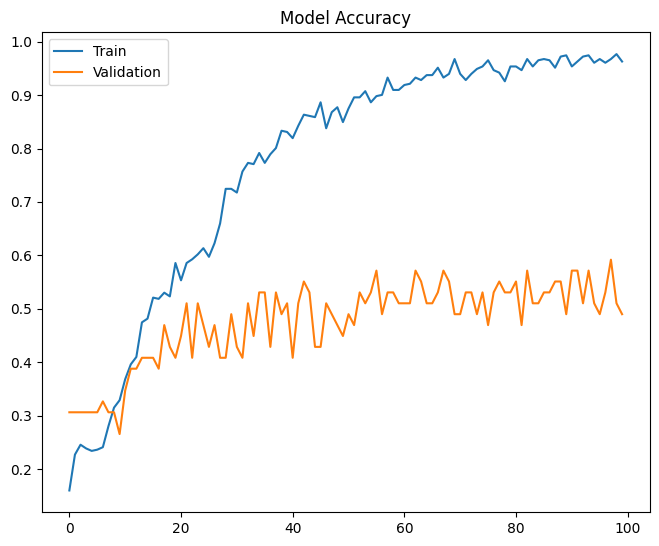

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [90]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)